In [154]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [ ]:
# Desactiva las advertencias temporalmente
warnings.filterwarnings("ignore")

Funciones

In [4]:
# Función para abrir archivos parquet en un dataframe, open_parquet(args:archivo)
def open_parquet(archivo):
    df = pd.read_parquet(f'dataset/{archivo}')
    return df

In [40]:
# Función para el conteo de valores unicos por columna con filtro
def valores_unicos_columna(df, columna):
    conteo = df[columna].value_counts()
    return conteo

# Relaciones entre tablas

Ahora abriremos los 5 archivos parquet que tenemos a nuestra disposicion

In [166]:
steam_games = open_parquet('steam_games.parquet')

In [6]:
steam_games.sample(5)

,item_id,item_name,developer,price,release_year
1082,48232,Might &amp; Magic: Heroes VI - Danse Macabre A...,Limbic Entertainment GmbH,9.99,2012
18934,551650,The Bedtime Story,Brandon Serowski,2.99,2017
2070,284950,Pixel Puzzles: Japan,DL Softworks,6.99,2014
23841,450790,Tom Clancy's Rainbow Six® Siege - Ruby Weapon ...,Ubisoft Montreal,2.99,2016
27074,314530,Aware,"Guilherme Nunes Barbosa,Lennie Svensson,Morgan...",12.99,2015


In [7]:
steam_games_genres = open_parquet('steam_games_genres.parquet')

In [9]:
steam_games_genres.sample(5)

,item_id,2D,Accounting,Action,Action RPG,Adventure,Animation &amp; Modeling,Anime,Arcade,Atmospheric,...,Tower Defense,Turn-Based,Turn-Based Strategy,Utilities,VR,Video Production,Violent,Visual Novel,Web Publishing,Zombies
5326,444820,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20562,452230,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17349,573832,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4279,378580,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10227,640500,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [194]:
user_items = open_parquet('user_items.parquet')

In [12]:
user_items.sample(5)

,steam_id,user_id,items_count
51400,76561198045426198,ISmellGravy,0
67795,76561198072769249,emilyxxxx,0
69587,76561198074807963,76561198074807963,1
16146,76561198039521111,Tarvo69,226
75728,76561198085105443,76561198085105443,0


In [13]:
user_items_list = open_parquet('user_items_list.parquet')

In [14]:
user_items_list.sample(5)

,steam_id,item_id,playtime_forever
836497,76561198049565195,6860,0
3574434,76561198086913358,209870,682
277489,76561198055321862,304930,8
724124,76561198053724215,218680,724
1847634,76561198043803212,254060,0


In [15]:
user_reviews = open_parquet('user_reviews.parquet')

In [16]:
user_reviews.sample(5)

,steam_id,item_id,posted,recommend,analisis_sentimiento
18346,76561198077662752,379720,2016,1,1
8144,76561198086790592,449800,2016,1,0
4451,76561198042187536,304930,2014,1,2
58092,76561198156015936,306460,2014,1,2
21535,76561198049524512,440,2013,1,2


Una vez tenemos nuestro dataset ahora podemos encontrar como se relacionan estas 5 tablas

|steam_games.parquet|steam_games_genres.parquet|user_items.parquet|user_items_list.parquet|user_reviews.parquet|
|-|-|-|-|-|
| | |***steam_id***|***steam_id***|***steam_id***|
|***item_id***|***item_id***||***item_id***|***item_id***|
|item_name|genres|user_id|playtime_forever|posted|
|developer||items_count| |recommend|
|release_year| | | |analisis_sentimiento|
|price| | | | |

Podemos observar que las tablas se relacionan entre si principalmente por steam_id e item_id.

Hasta este punto ya encontramos las relaciones y eliminamos la mayoria del ruido en las tablas, nos faltaria verificar la presencia de outliers y tratarlos segun corresponda

# Tratamiento de Outliers

## - steam_games

En esta tabla buscaremos los outliers en las columnas release_year y price

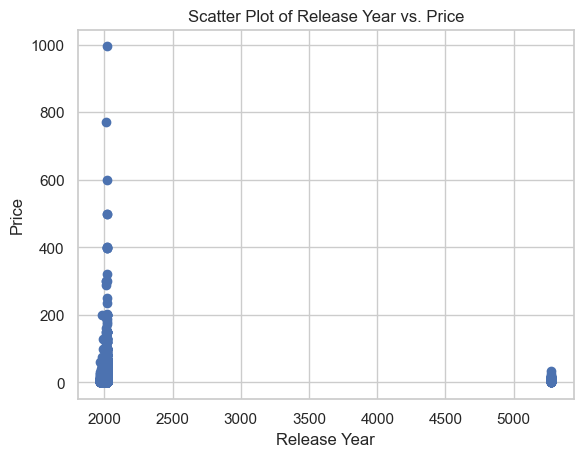

In [167]:
import matplotlib.pyplot as plt

plt.scatter(steam_games['release_year'], steam_games['price'])
plt.xlabel('Release Year')
plt.ylabel('Price')
plt.title('Scatter Plot of Release Year vs. Price')
plt.show()

Podemos observar que hay outliers para ambas columnas, primero trateremos release year

In [168]:
conteo = steam_games['release_year'].value_counts()

In [169]:
filtro = conteo[conteo.index > 5000]
filtro

release_year
5275    50
Name: count, dtype: int64

In [170]:
media_sin_outliers = steam_games[(steam_games['release_year'] <= 5000)]['release_year'].mean().astype(int)
media_sin_outliers

2013

In [171]:
steam_games.loc[steam_games['release_year'] > 5000, 'release_year'] = media_sin_outliers


In [172]:
steam_games_release_year = valores_unicos_columna(steam_games, 'release_year')

In [173]:
filtro = steam_games_release_year[steam_games_release_year.index > 5000]
filtro

Series([], Name: count, dtype: int64)

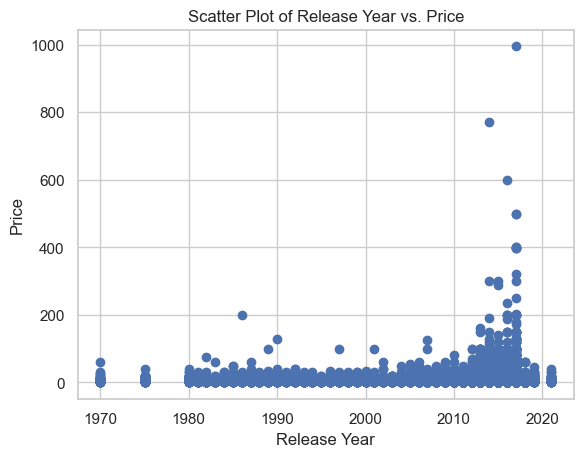

In [174]:
import matplotlib.pyplot as plt

plt.scatter(steam_games['release_year'], steam_games['price'])
plt.xlabel('Release Year')
plt.ylabel('Price')
plt.title('Scatter Plot of Release Year vs. Price')
plt.show()

Ahora podemos observar que en la columna price tenemos valores que que se alejan demasiado de los valores inferiores

In [175]:
conteo = steam_games['price'].value_counts()

Hacemos uso de boxplot

c:\Users\ERWIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


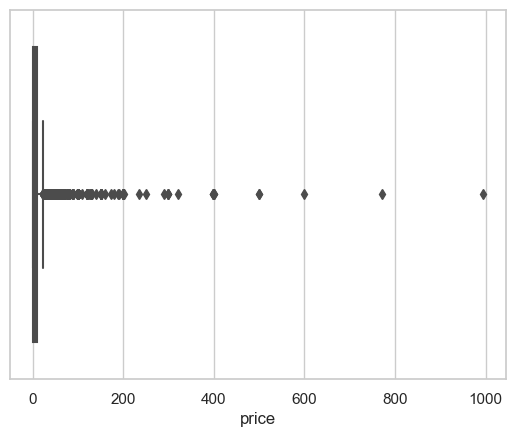

In [176]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=steam_games['price'])
plt.show()

Con boxplot podemos observar una gran cantidad de outliers, ademas tambien podemos ver que la distribución es de tipo asimétrica positiva

c:\Users\ERWIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ERWIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


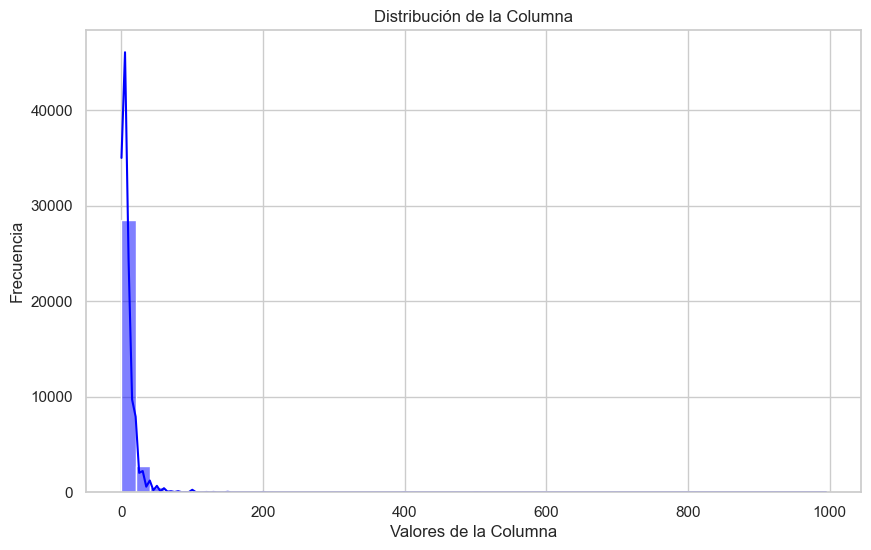

In [177]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de estilo para seaborn
sns.set(style="whitegrid")

# Crear un histograma y una gráfica de densidad
plt.figure(figsize=(10, 6))
sns.histplot(steam_games['price'], bins=50, kde=True, color='blue')

# Añadir título y etiquetas
plt.title('Distribución de la Columna')
plt.xlabel('Valores de la Columna')
plt.ylabel('Frecuencia')

# Mostrar la gráfica
plt.show()


In [178]:
# Calcular asimetría y curtosis
asimetria = steam_games['price'].skew()
curtosis = steam_games['price'].kurtosis()

print(f'Asimetría: {asimetria}')
print(f'Curtosis: {curtosis}')


Asimetría: 20.723364968610248
Curtosis: 884.4542261464215


Confirmamos una vez mas la asimetrica y la curtosis

Para este punto es importante encontrar la forma de tratar estos datos, para ello podemos usar varias tecnicas, para el caso presente usaremos el metodo boxcox para buscar la forma de tener una distribución que se asemeje a la normal

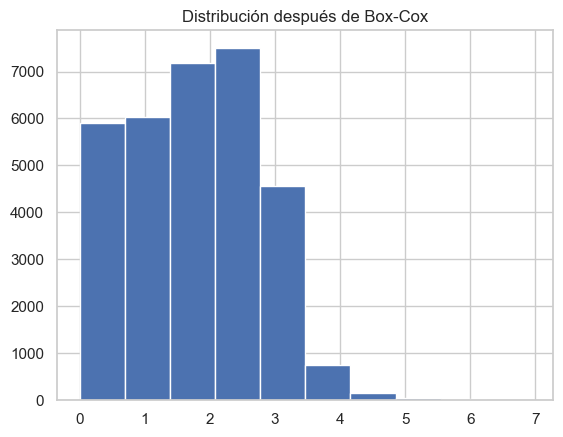

Valor óptimo de lambda: 0.001139385825949613


In [179]:
from scipy.stats import boxcox
import matplotlib.pyplot as plt

# Aplicar transformación Box-Cox
transformed_data, lambda_value = boxcox(steam_games['price'] + 1)  # Se agrega 1 para manejar ceros

# Visualizar la distribución transformada
plt.hist(transformed_data, bins=10)
plt.title("Distribución después de Box-Cox")
plt.show()

print(f"Valor óptimo de lambda: {lambda_value}")

Con el lambda ajustado podemos determinar que la transformación adecuada es usar el logaritmo natural

In [180]:
steam_games['price_boxcox'] = transformed_data

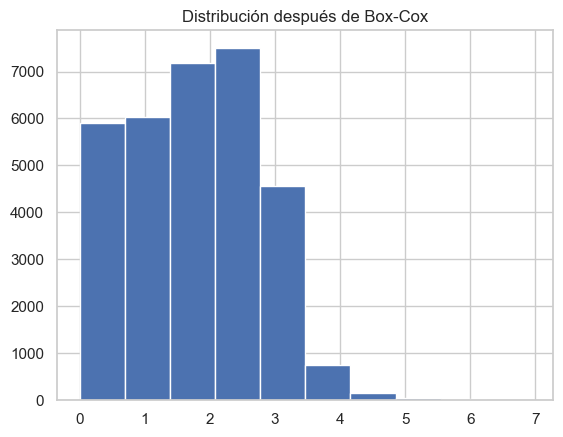

In [181]:
plt.hist(steam_games['price_boxcox'], bins=10)
plt.title("Distribución después de Box-Cox")
plt.show()

c:\Users\ERWIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


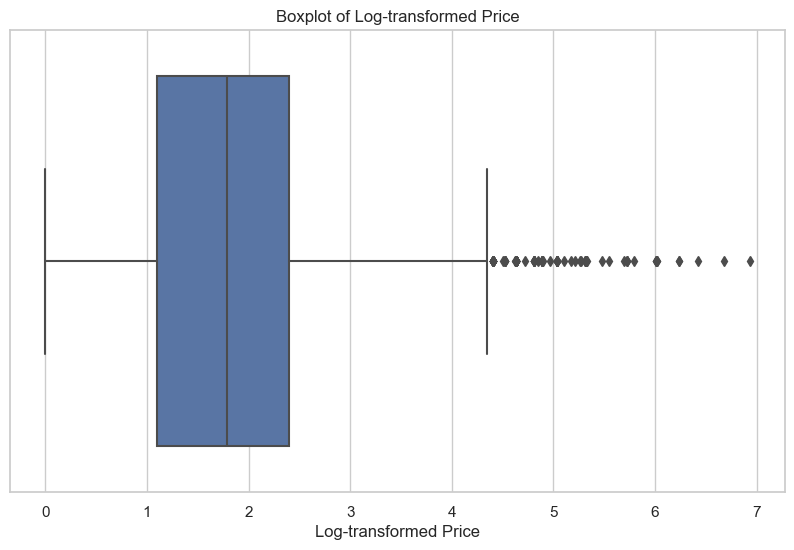

In [182]:
import seaborn as sns

# Diagrama de cajas para la columna logaritmica
plt.figure(figsize=(10, 6))
sns.boxplot(x=steam_games['price_boxcox'])
plt.xlabel('Log-transformed Price')
plt.title('Boxplot of Log-transformed Price')
plt.show()


In [183]:
import numpy as np

# Calcular la media y la desviación estándar de la columna logaritmica
mean_price_log = steam_games['price_boxcox'].mean()
std_price_log = steam_games['price_boxcox'].std()

# Definir los límites superior e inferior
upper_limit = mean_price_log + 3 * std_price_log
lower_limit = mean_price_log - 3 * std_price_log

# Filtrar filas con valores fuera de los límites
outliers_std = steam_games[(steam_games['price_boxcox'] > upper_limit) | (steam_games['price_boxcox'] < lower_limit)]

# Mostrar las filas con outliers
outliers_std

,item_id,item_name,developer,price,release_year,price_boxcox
2119,282240,Wing IDE 5 - Commercial Use,Wingware,119.99,2014,4.808834
2228,300870,Fantasy Grounds - Ultimate Upgrade,"SmiteWorks USA, LLC",109.99,2014,4.722098
2334,310300,RIFT: Laethys' Fortune Pack,Trion Worlds,149.99,2014,5.031582
2391,292180,X-Plane 10 Global - 64 Bit,Laminar Research,771.71,2014,6.675160
3258,342570,HIS (Heroes In the Sky),GameUS Inc.,139.92,2015,4.962167
4444,401090,MODO indie 10,The Foundry,299.99,2015,5.725673
4705,345720,The Official AppGameKit Tutorial Guide Vol 1,"Digital Skills,The Game Creators",119.99,2015,4.808834
6860,377340,ChessBase 13 Academy,Chessbase,149.99,2016,5.031582
6861,377350,ChessBase 13 Pro,Chessbase,234.99,2016,5.480832
6897,504720,Music Maker 2017 Premium Steam Edition,MAGIX Software GmbH,119.99,2016,4.808834


En este punto podemos tratar los datos anormales o outliers, no obstante haciendo un cotejo mas profundo sobre estos datos podemos dar cuenta que si bien no se acomodan adecuadamente a la distribución estos si son validos por lo que estos datos se mantendran sin cambios

In [186]:
steam_games = steam_games.drop('price_boxcox', axis=1)

Guardamos el archivo

In [189]:
steam_games.to_parquet('dataset/steam_games.parquet')

## - user_items

c:\Users\ERWIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


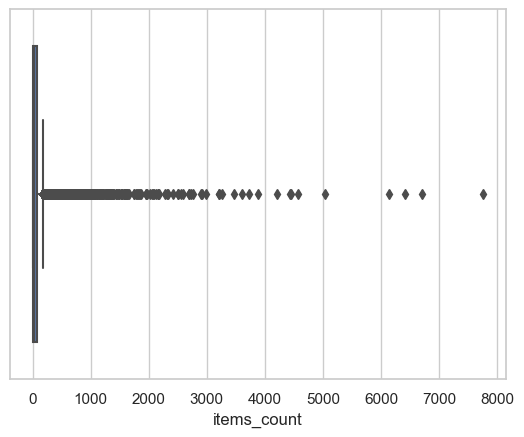

In [195]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=user_items['items_count'])
plt.show()

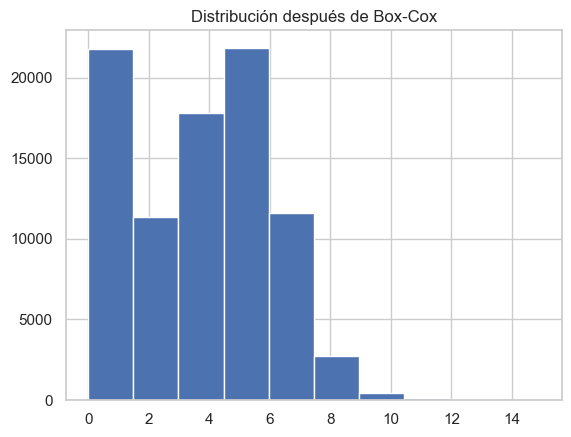

Valor óptimo de lambda: 0.10534589224888528


In [196]:
from scipy.stats import boxcox
import matplotlib.pyplot as plt

# Aplicar transformación Box-Cox
transformed_data, lambda_value = boxcox(user_items['items_count'] + 1)  # Se agrega 1 para manejar ceros

# Visualizar la distribución transformada
plt.hist(transformed_data, bins=10)
plt.title("Distribución después de Box-Cox")
plt.show()

print(f"Valor óptimo de lambda: {lambda_value}")

In [197]:
user_items['items_count_boxcox'] = transformed_data

c:\Users\ERWIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


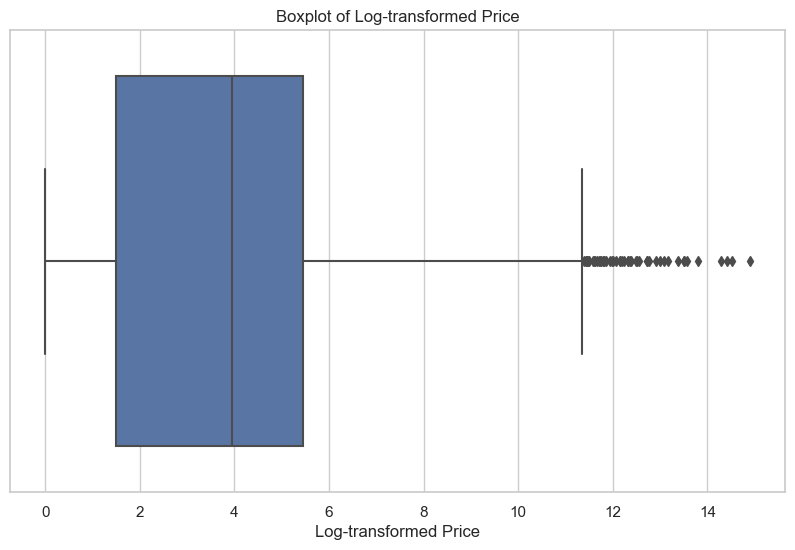

In [199]:
import seaborn as sns

# Diagrama de cajas para la columna logaritmica
plt.figure(figsize=(10, 6))
sns.boxplot(x=user_items['items_count_boxcox'])
plt.xlabel('Log-transformed Price')
plt.title('Boxplot of Log-transformed Price')
plt.show()


In [200]:
# Calcular la media y la desviación estándar de la columna logaritmica
mean_price_log = user_items['items_count_boxcox'].mean()
std_price_log = user_items['items_count_boxcox'].std()

# Definir los límites superior e inferior
upper_limit = mean_price_log + 3 * std_price_log
lower_limit = mean_price_log - 3 * std_price_log

# Filtrar filas con valores fuera de los límites
outliers_std = user_items[(user_items['items_count_boxcox'] > upper_limit) | (user_items['items_count_boxcox'] < lower_limit)]

# Mostrar las filas con outliers
outliers_std

,steam_id,user_id,items_count,items_count_boxcox
1103,76561198001518866,chidvd,6410,14.409029
1635,76561198008335925,Efreak,2122,11.782135
2466,76561198006944554,idonothack,1946,11.589062
3696,76561198102767019,phrostb,7762,14.895733
3778,76561198096187727,primalcrescent,2157,11.818814
...,...,...,...,...
44208,76561197998887921,Brizbrenz,2316,11.979017
45824,76561198016475503,komarexpl,2018,11.669861
48814,76561198038179236,akministrator,1747,11.350969
55951,76561198057106658,mercoledi,1622,11.188686


In [201]:
user_items_list

,steam_id,item_id,playtime_forever
0,76561197970982479,10,6
1,76561197970982479,20,0
2,76561197970982479,30,7
3,76561197970982479,40,0
4,76561197970982479,50,0
...,...,...,...
5094077,76561198329548331,346330,0
5094078,76561198329548331,373330,0
5094079,76561198329548331,388490,3
5094080,76561198329548331,521570,4


In [202]:
conteo_steam_id = user_items_list['steam_id'].value_counts().reset_index()
conteo_steam_id.columns = ['steam_id', 'conteo']

In [203]:
conteo_steam_id

,steam_id,conteo
0,76561198102767019,7762
1,76561198000537256,6700
2,76561198001518866,6410
3,76561198118965684,6132
4,76561198048151962,5027
...,...,...
70907,76561198097766503,1
70908,76561198097766667,1
70909,76561198088085919,1
70910,76561198097768661,1


In [204]:
# Fusiona los DataFrames para comparar los conteos
merged = pd.merge(outliers_std, conteo_steam_id, on='steam_id', how='left')


In [205]:
merged

,steam_id,user_id,items_count,items_count_boxcox,conteo
0,76561198001518866,chidvd,6410,14.409029,6410
1,76561198008335925,Efreak,2122,11.782135,2122
2,76561198006944554,idonothack,1946,11.589062,1946
3,76561198102767019,phrostb,7762,14.895733,7762
4,76561198096187727,primalcrescent,2157,11.818814,2157
...,...,...,...,...,...
69,76561197998887921,Brizbrenz,2316,11.979017,2316
70,76561198016475503,komarexpl,2018,11.669861,2018
71,76561198038179236,akministrator,1747,11.350969,1747
72,76561198057106658,mercoledi,1622,11.188686,1622


Podemos verificar que a pesar de haber numeros altos no encontramos la presencia de outliers como tal por lo que la tabla no se modifica

Las demas tablas no necesitan de un tratamiento como tal de outliers puesto que sus datos ya estan estandarizados por lo que hasta este punto concluye lo que es el ETL de los datos solo habiendo modificado la tabla steam_games.parquet